In [1]:
from dqn_agent import DQN
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
names=[] # keep track of names for plotting at the end


# basic parameters
p = dict(
    env_name =          'Breakout', # defaults to NoFrameskip-v4 version
    log_dir=            'Breakout_tests',
    overwrite_previous= False,
    asynchronous=       False,
    
    doubleQ=            False,
    dueling=            False,
    noisy_linear=       False,
    categorical_DQN=    False,
    prioritized_replay= False,
    n_step_learning=    False,
    
    screen_size=        42,
    eval_interval=      100_000,
    max_steps=          10_000_000, 
    record_interval=    5_000_000, 
    n_games_per_eval=   5,
    n_envs=             16,
    pbar_update_interval= 800,
    seed=               42
    )


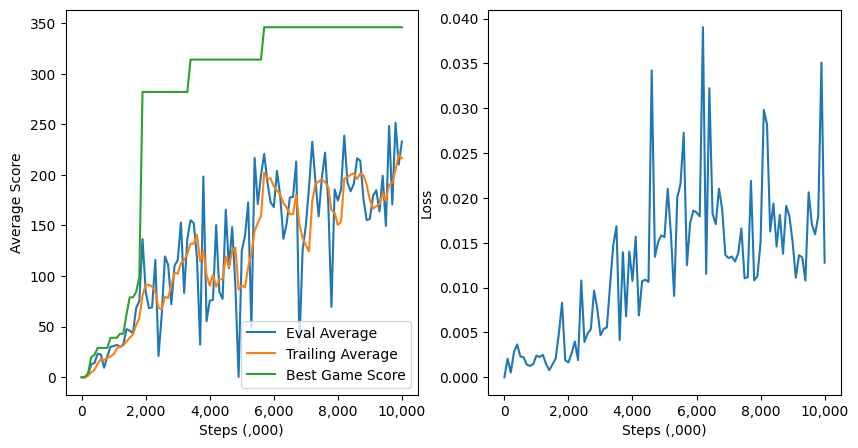

steps=10000000, episodes=62350
Best Score: 346.0
Trailing Avg (last 20): 216.4
Time elapsed: 2:31:56


steps:100%|███████████|10,000,000/10,000,000[t:2:31:56/00:00], eps=62,350, ev_avg=210.2, tr_avg=220.2, rate=1097.7 stp/s


In [2]:
p.update(
    name=               'DDQN',
    note=               '''16 vectorized environments. ''',

    doubleQ=            True,
    dueling=            False,
    noisy_linear=       False,
    categorical_DQN=    False,
    prioritized_replay= False,
    n_step_learning=    False,
    )
dqn = DQN(p)

dqn.train()
names.append(dqn.filepaths.sub_dir)


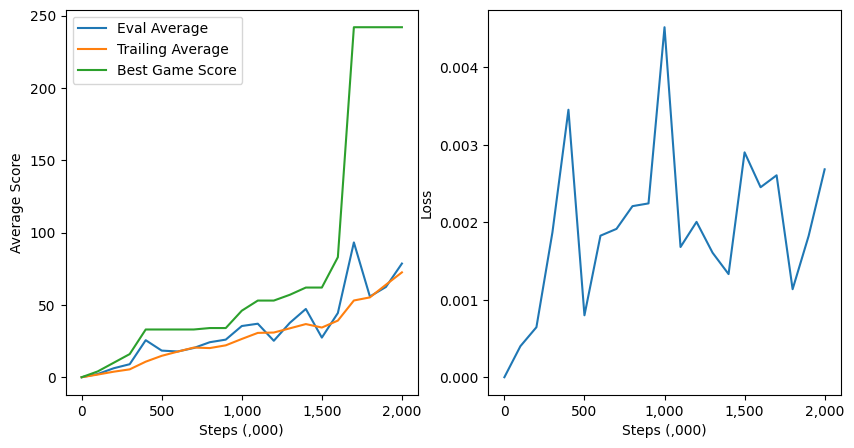

steps: 20%|██▊           |2,045,600/10,000,000[t:31:03/1:46:28], eps=23,493, ev_avg=78.6, tr_avg=72.5, rate=1097.4 stp/s

In [ ]:
''' Vanilla DQN'''

p.update(
    name=               'DQN',
    doubleQ=            False,
    dueling=            False,
    noisy_linear=       False,
    categorical_DQN=    False,
    prioritized_replay= False,
    n_step_learning=    False,
    )
dqn = DQN(p)
dqn.train()
names.append(dqn.filepaths.sub_dir)


In [ ]:
''' Rainbow DQN'''

p.update(
    name=               'Rainbow',
    doubleQ=            True,
    dueling=            True,
    noisy_linear=       True,
    categorical_DQN=    True,
    prioritized_replay= True,
    n_step_learning=    True,
    )
dqn = DQN(p)
dqn.train()
names.append(dqn.filepaths.sub_dir)



In [ ]:
# plot all the results in the log folder
from modules.utils import plot_multiple_results
import os
col = 'trailing_avg'
assert col in ['best_score','eval_avg','trailing_avg','loss']

from plot_multiple_results import plot_multiple_results

plot_multiple_results(os.path.join('logs',p['log_dir']), names, 'trailing_avg')
